In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import squarify

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);

pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [2]:
customer = pd.read_csv('data/online_retail_II.csv')
df = customer.copy()

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,7,13085,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,7,13085,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,7,13085,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2,13085,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1,13085,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
df.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,1067371,10,173,-80995,1,3,10,80995
Price,1067371,5,124,-53594,1,2,4,38970
Customer ID,824364,15325,1697,12346,13975,15255,16797,18287


We can see there are some negative quantities and prices

In [7]:
df[df.Quantity<=0]['Invoice'].count()

22950

In [8]:
df[df.Price<=0]['Invoice'].count()

6207

We need to get rid of these datas

In [9]:
df = df[(df.Quantity>0) & (df.Price>0)]
len(df)

1041671

In [10]:
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]
len(df)

1041671

In [11]:
df['TotalPrice'] = df.Quantity * df.Price

In [12]:
df.Description.nunique()

5399

In [13]:
df.Invoice.nunique()

40078

In [14]:
df.groupby("Description").agg({"Quantity":"sum"}).head()

,Quantity
Description,
DOORMAT UNION JACK GUNS AND ROSES,179
3 STRIPEY MICE FELTCRAFT,692
4 PURPLE FLOCK DINNER CANDLES,351
50'S CHRISTMAS GIFT BAG LARGE,1915
ANIMAL STICKERS,385


In [15]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,7,13085,United Kingdom,83
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,7,13085,United Kingdom,81
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,7,13085,United Kingdom,81
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2,13085,United Kingdom,101
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1,13085,United Kingdom,30


In [16]:
# The most expensive products
df.sort_values('Price',ascending=False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111,nan,United Kingdom,25111
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541,nan,United Kingdom,13541
540478,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541,nan,United Kingdom,13541
825443,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062,nan,United Kingdom,11062
135013,502263,M,Manual,1,2010-03-23 15:22:00,10954,12918,United Kingdom,10954


In [17]:
# The order quantity from each country
df.Country.value_counts().to_frame().head()

,Country
United Kingdom,958502
EIRE,17349
Germany,16694
France,13940
Netherlands,5088


In [18]:
df.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    236122
Country             0
TotalPrice          0
dtype: int64

In [19]:
# As we are going to do segmentation, Customer ID is the key for us and we have to drop null values
df.dropna(inplace = True)

In [20]:
df.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,805549,13,144,1,1,1,1,2,5,12,24,36,128,80995
Price,805549,3,29,0,0,0,1,1,2,4,7,8,15,10954
Customer ID,805549,15332,1697,12346,12422,12681,12979,13982,15271,16805,17716,17913,18204,18287
TotalPrice,805549,22,224,0,1,1,2,5,12,20,35,68,202,168470


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805549 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      805549 non-null  object 
 1   StockCode    805549 non-null  object 
 2   Description  805549 non-null  object 
 3   Quantity     805549 non-null  int64  
 4   InvoiceDate  805549 non-null  object 
 5   Price        805549 non-null  float64
 6   Customer ID  805549 non-null  float64
 7   Country      805549 non-null  object 
 8   TotalPrice   805549 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 61.5+ MB


In [22]:
# Lets change the format of the invoiceDate
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])


In [23]:
rfm = df.groupby(['Customer ID']).agg({
'Invoice': 'nunique',
'TotalPrice': 'sum'})
rfm.head()

,Invoice,TotalPrice
Customer ID,,
12346,12,77556
12347,8,5633
12348,5,2019
12349,4,4429
12350,1,334


In [24]:
rfm['Recency'] = (df['InvoiceDate'].max()-df.groupby('Customer ID')['InvoiceDate'].max()).dt.days.to_frame()
rfm.head()

,Invoice,TotalPrice,Recency
Customer ID,,,
12346,12,77556,325
12347,8,5633,1
12348,5,2019,74
12349,4,4429,18
12350,1,334,309


In [25]:
rfm.rename(columns={'Invoice': 'Frequency','TotalPrice': 'MonetaryValue'}, inplace=True)

In [26]:
rfm.head()

,Frequency,MonetaryValue,Recency
Customer ID,,,
12346,12,77556,325
12347,8,5633,1
12348,5,2019,74
12349,4,4429,18
12350,1,334,309


In [27]:
rfm.groupby('Recency').count().head()

,Frequency,MonetaryValue
Recency,,
0,93,93
1,86,86
2,89,89
3,111,111
4,63,63


In [28]:
r_quartiles = pd.qcut(rfm['Recency'], 5, labels = range(5,0,-1))
rfm = rfm.assign(R = r_quartiles.values)

In [29]:
rfm.describe([0.01,0.2,0.4,0.6,0.8,0.99]).T

,count,mean,std,min,1%,20%,40%,50%,60%,80%,99%,max
Frequency,5878,6,13,1,1,1,2,3,4,8,46,398
MonetaryValue,5878,3019,14738,3,47,291,618,899,1249,2967,29730,608822
Recency,5878,200,209,0,0,18,58,95,188,409,725,738


In [30]:
rfm['R_Score'] = pd.qcut( rfm['Recency'] ,5, labels = [5,4,3,2,1] )
rfm['F_Score'] =  pd.qcut(rfm['Frequency'].rank(method="first"),5,labels=[1,2,3,4,5])
rfm['M_Score'] = pd.qcut(rfm['MonetaryValue'],5,labels = [1,2,3,4,5] )
rfm.head()

,Frequency,MonetaryValue,Recency,R,R_Score,F_Score,M_Score
Customer ID,,,,,,,
12346,12,77556,325,2,2,5,5
12347,8,5633,1,5,5,4,5
12348,5,2019,74,3,3,4,4
12349,4,4429,18,5,5,3,5
12350,1,334,309,2,2,1,2


In [31]:
rfm['RFM_Score'] = rfm.R_Score.astype(str) + rfm.F_Score.astype(str) + rfm.M_Score.astype(str)
rfm.head(10)

,Frequency,MonetaryValue,Recency,R,R_Score,F_Score,M_Score,RFM_Score
Customer ID,,,,,,,,
12346,12,77556,325,2,2,5,5,255
12347,8,5633,1,5,5,4,5,545
12348,5,2019,74,3,3,4,4,344
12349,4,4429,18,5,5,3,5,535
12350,1,334,309,2,2,1,2,212
12351,1,301,374,2,2,1,2,212
12352,10,2850,35,4,4,5,4,454
12353,2,407,203,2,2,2,2,222
12354,1,1079,231,2,2,1,3,213


In [32]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

In [33]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5878 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Frequency      5878 non-null   int64   
 1   MonetaryValue  5878 non-null   float64 
 2   Recency        5878 non-null   int64   
 3   R              5878 non-null   category
 4   R_Score        5878 non-null   category
 5   F_Score        5878 non-null   category
 6   M_Score        5878 non-null   category
 7   RFM_Score      5878 non-null   object  
dtypes: category(4), float64(1), int64(2), object(1)
memory usage: 253.3+ KB


In [34]:
rfm['RFM_Score']=rfm['RFM_Score'].astype('int64')
rfm['R_Score']=rfm['R_Score'].astype('int64')
rfm['F_Score']=rfm['F_Score'].astype('int64')
rfm['M_Score']=rfm['M_Score'].astype('int64')
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 5878 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Frequency      5878 non-null   int64   
 1   MonetaryValue  5878 non-null   float64 
 2   Recency        5878 non-null   int64   
 3   R              5878 non-null   category
 4   R_Score        5878 non-null   int64   
 5   F_Score        5878 non-null   int64   
 6   M_Score        5878 non-null   int64   
 7   RFM_Score      5878 non-null   int64   
dtypes: category(1), float64(1), int64(6)
memory usage: 373.2 KB


In [35]:
rfm['Segment'] = rfm['R_Score'].map(str) + rfm['F_Score'].map(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)
rfm.head()

,Frequency,MonetaryValue,Recency,R,R_Score,F_Score,M_Score,RFM_Score,Segment
Customer ID,,,,,,,,,
12346,12,77556,325,2,2,5,5,255,Can't Loose
12347,8,5633,1,5,5,4,5,545,Champions
12348,5,2019,74,3,3,4,4,344,Loyal Customers
12349,4,4429,18,5,5,3,5,535,Potential Loyalists
12350,1,334,309,2,2,1,2,212,Hibernating


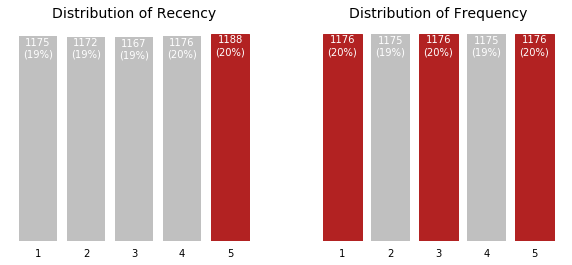

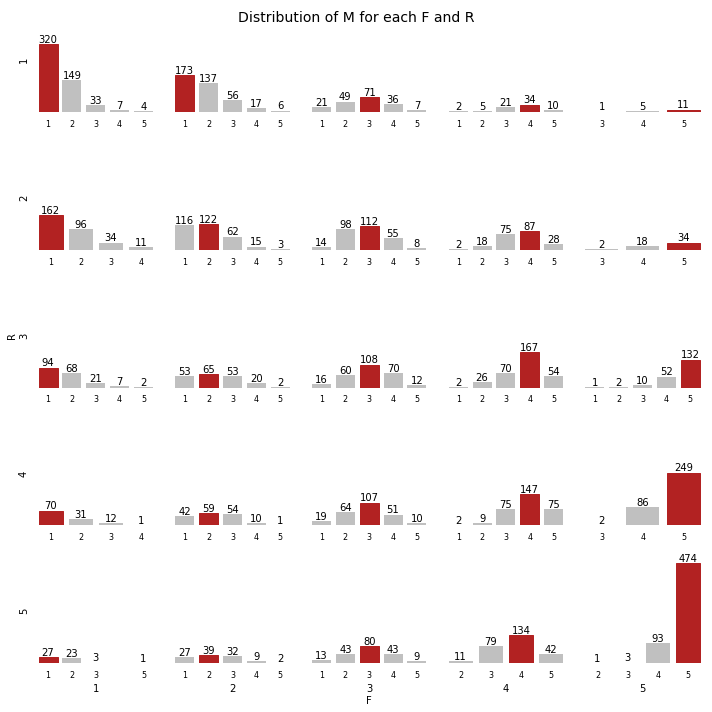

In [36]:
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R_Score', 'F_Score']):
    parameters = {'R_Score':'Recency', 'F_Score':'Frequency'}
    y = rfm[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('firebrick')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')
        
plt.show()

# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm[(rfm['R_Score'] == r) & (rfm['F_Score'] == f)]['M_Score'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('firebrick')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')

fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
plt.show()

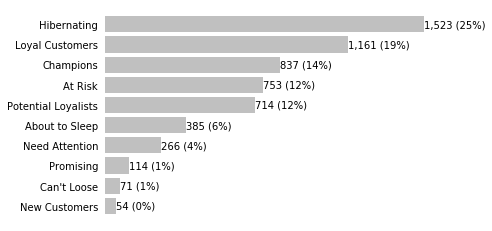

In [37]:
# count the number of customers in each segment
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

In [40]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
rfm_level_agg

Recency Frequency MonetaryValue      
                       mean      mean          mean count
Segment                                                  
About to Sleep          106         1           534   385
At Risk                 372         4          1382   753
Can't Loose             330        16          8356    71
Champions                 8        19         10901   837
Hibernating             458         1           438  1523
Loyal Customers          66        10          4212  1161
Need Attention          112         3          1284   266
New Customers            10         1           361    54
Potential Loyalists      25         3          1156   714
Promising                38         1           319   114

In [41]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
rfm_level_agg.columns

Index(['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count'], dtype='object')

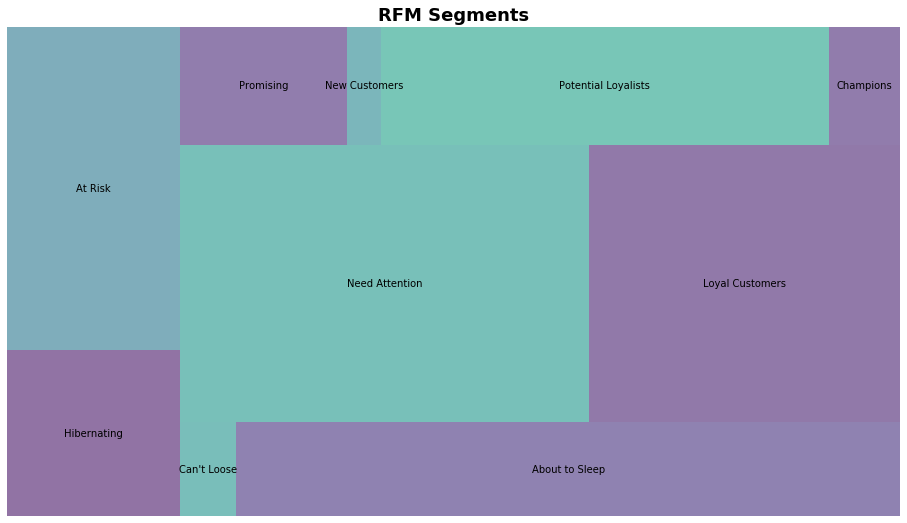

In [42]:
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=seg_map.values(), alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()